In [10]:
import pandas as pd
from pandas import read_csv, DataFrame
import numpy as bo
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
import numpy as np
from tqdm import tqdm

In [125]:
full_data = {'single': {}, 
             'pool' : {}}


otutab = read_csv('/mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/EXTERNAL/EXTERNAL_ZYMO/mock_Zymo_single/merged_otu_table.tsv', sep='\t', index_col=0)
taxtab = read_csv('/mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/EXTERNAL/EXTERNAL_ZYMO/mock_Zymo_single//TAXONOMY/tax_table.tsv', sep='\t', index_col=0)


for taxlevel in ['Genus', 'Species', 'OTU']:
    
    full_data['single'][taxlevel] = []
    metadata = {samp : {} for samp in otutab.index}
    otu_count = 0
    
    for i in otutab.columns:
        try:
            
            
            
            if taxlevel == 'OTU':
                
                taxon = ' '.join(taxtab['Species'][i].split(' ')[:2])
                taxon = f'OTU{otu_count}_{taxon}' 
                taxon = f'OTU{otu_count}_g_{taxtab["Genus"][i]}_s_{taxon}'
                otu_count += 1
            
            if taxlevel == 'Genus':
                
                taxon = f'g_{taxtab[taxlevel][i]}'
                
            if taxlevel == 'Species':
                
                taxon = ' '.join(taxtab['Species'][i].split(' ')[:2])
                taxon = f'g_{taxtab["Genus"][i]}_s_{taxon}'
        #    taxon = taxtab['Genus'][i]
    
        #    taxon = taxtab['Genus'][i]
    
        except:continue
        
        for samp in otutab.index:
                
            if taxon not in metadata[samp].keys():
                
                metadata[samp][taxon] = 0
            
            metadata[samp][taxon] += otutab[i][samp]
            
    metadata = DataFrame(metadata)   
    #metadata_df = read_csv('/mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/EXTERNAL/R9_single_2//work_dir/mock4_run3bc08_5000//metadata_df.tsv', sep='\t', index_col=0)
    #metadata_df = metadata_df[metadata_df.Clusters != -1]
    metadata = (metadata/metadata.sum(axis=0))#.sum(axis=0)
    metadata = metadata.assign(m=metadata.mean(axis=1)).sort_values('m').drop('m', axis=1)[np.sort(metadata.columns)]
    full_data['single'][taxlevel] = metadata

otutab = read_csv('/mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/EXTERNAL/EXTERNAL_ZYMO/mock_Zymo_pool/merged_otu_table.tsv', sep='\t', index_col=0)
taxtab = read_csv('/mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/EXTERNAL/EXTERNAL_ZYMO/mock_Zymo_pool//TAXONOMY/tax_table.tsv', sep='\t', index_col=0)

for taxlevel in ['Genus', 'Species', 'OTU']:
    
    full_data['pool'][taxlevel] = []
    metadata = {samp : {} for samp in otutab.index}
    otu_count = 0
    
    for i in otutab.columns:
        try:
            
            
            
            if taxlevel == 'OTU':
                
                taxon = ' '.join(taxtab['Species'][i].split(' ')[:2])
                taxon = f'OTU{otu_count}_{taxon}' 
                taxon = f'OTU{otu_count}_g_{taxtab["Genus"][i]}_s_{taxon}'
                otu_count += 1
            
            if taxlevel == 'Genus':
                
                taxon = f'g_{taxtab[taxlevel][i]}'
                
            if taxlevel == 'Species':
                
                taxon = ' '.join(taxtab['Species'][i].split(' ')[:2])
                taxon = f'g_{taxtab["Genus"][i]}_s_{taxon}'
        #    taxon = taxtab['Genus'][i]
    
        except:continue
        
        for samp in otutab.index:
                
            if taxon not in metadata[samp].keys():
                
                metadata[samp][taxon] = 0
            
            metadata[samp][taxon] += otutab[i][samp]
            
    metadata = DataFrame(metadata)
   # metadata_df = read_csv('/mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/EXTERNAL/R9_single_2//work_dir/mock4_run3bc08_5000//metadata_df.tsv', sep='\t', index_col=0)
    #metadata_df = metadata_df[metadata_df.Clusters != -1]
    metadata = (metadata/metadata.sum(axis=0))#.sum(axis=0)
    metadata = metadata.assign(m=metadata.mean(axis=1)).sort_values('m').drop('m', axis=1)[np.sort(metadata.columns)]
    full_data['pool'][taxlevel] = metadata

In [127]:
decode_names = {'barcode01' : 'ERR10318833',
 'barcode02' : 'ERR10318834',
 'barcode03' : 'ERR10318835'}

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.06it/s]


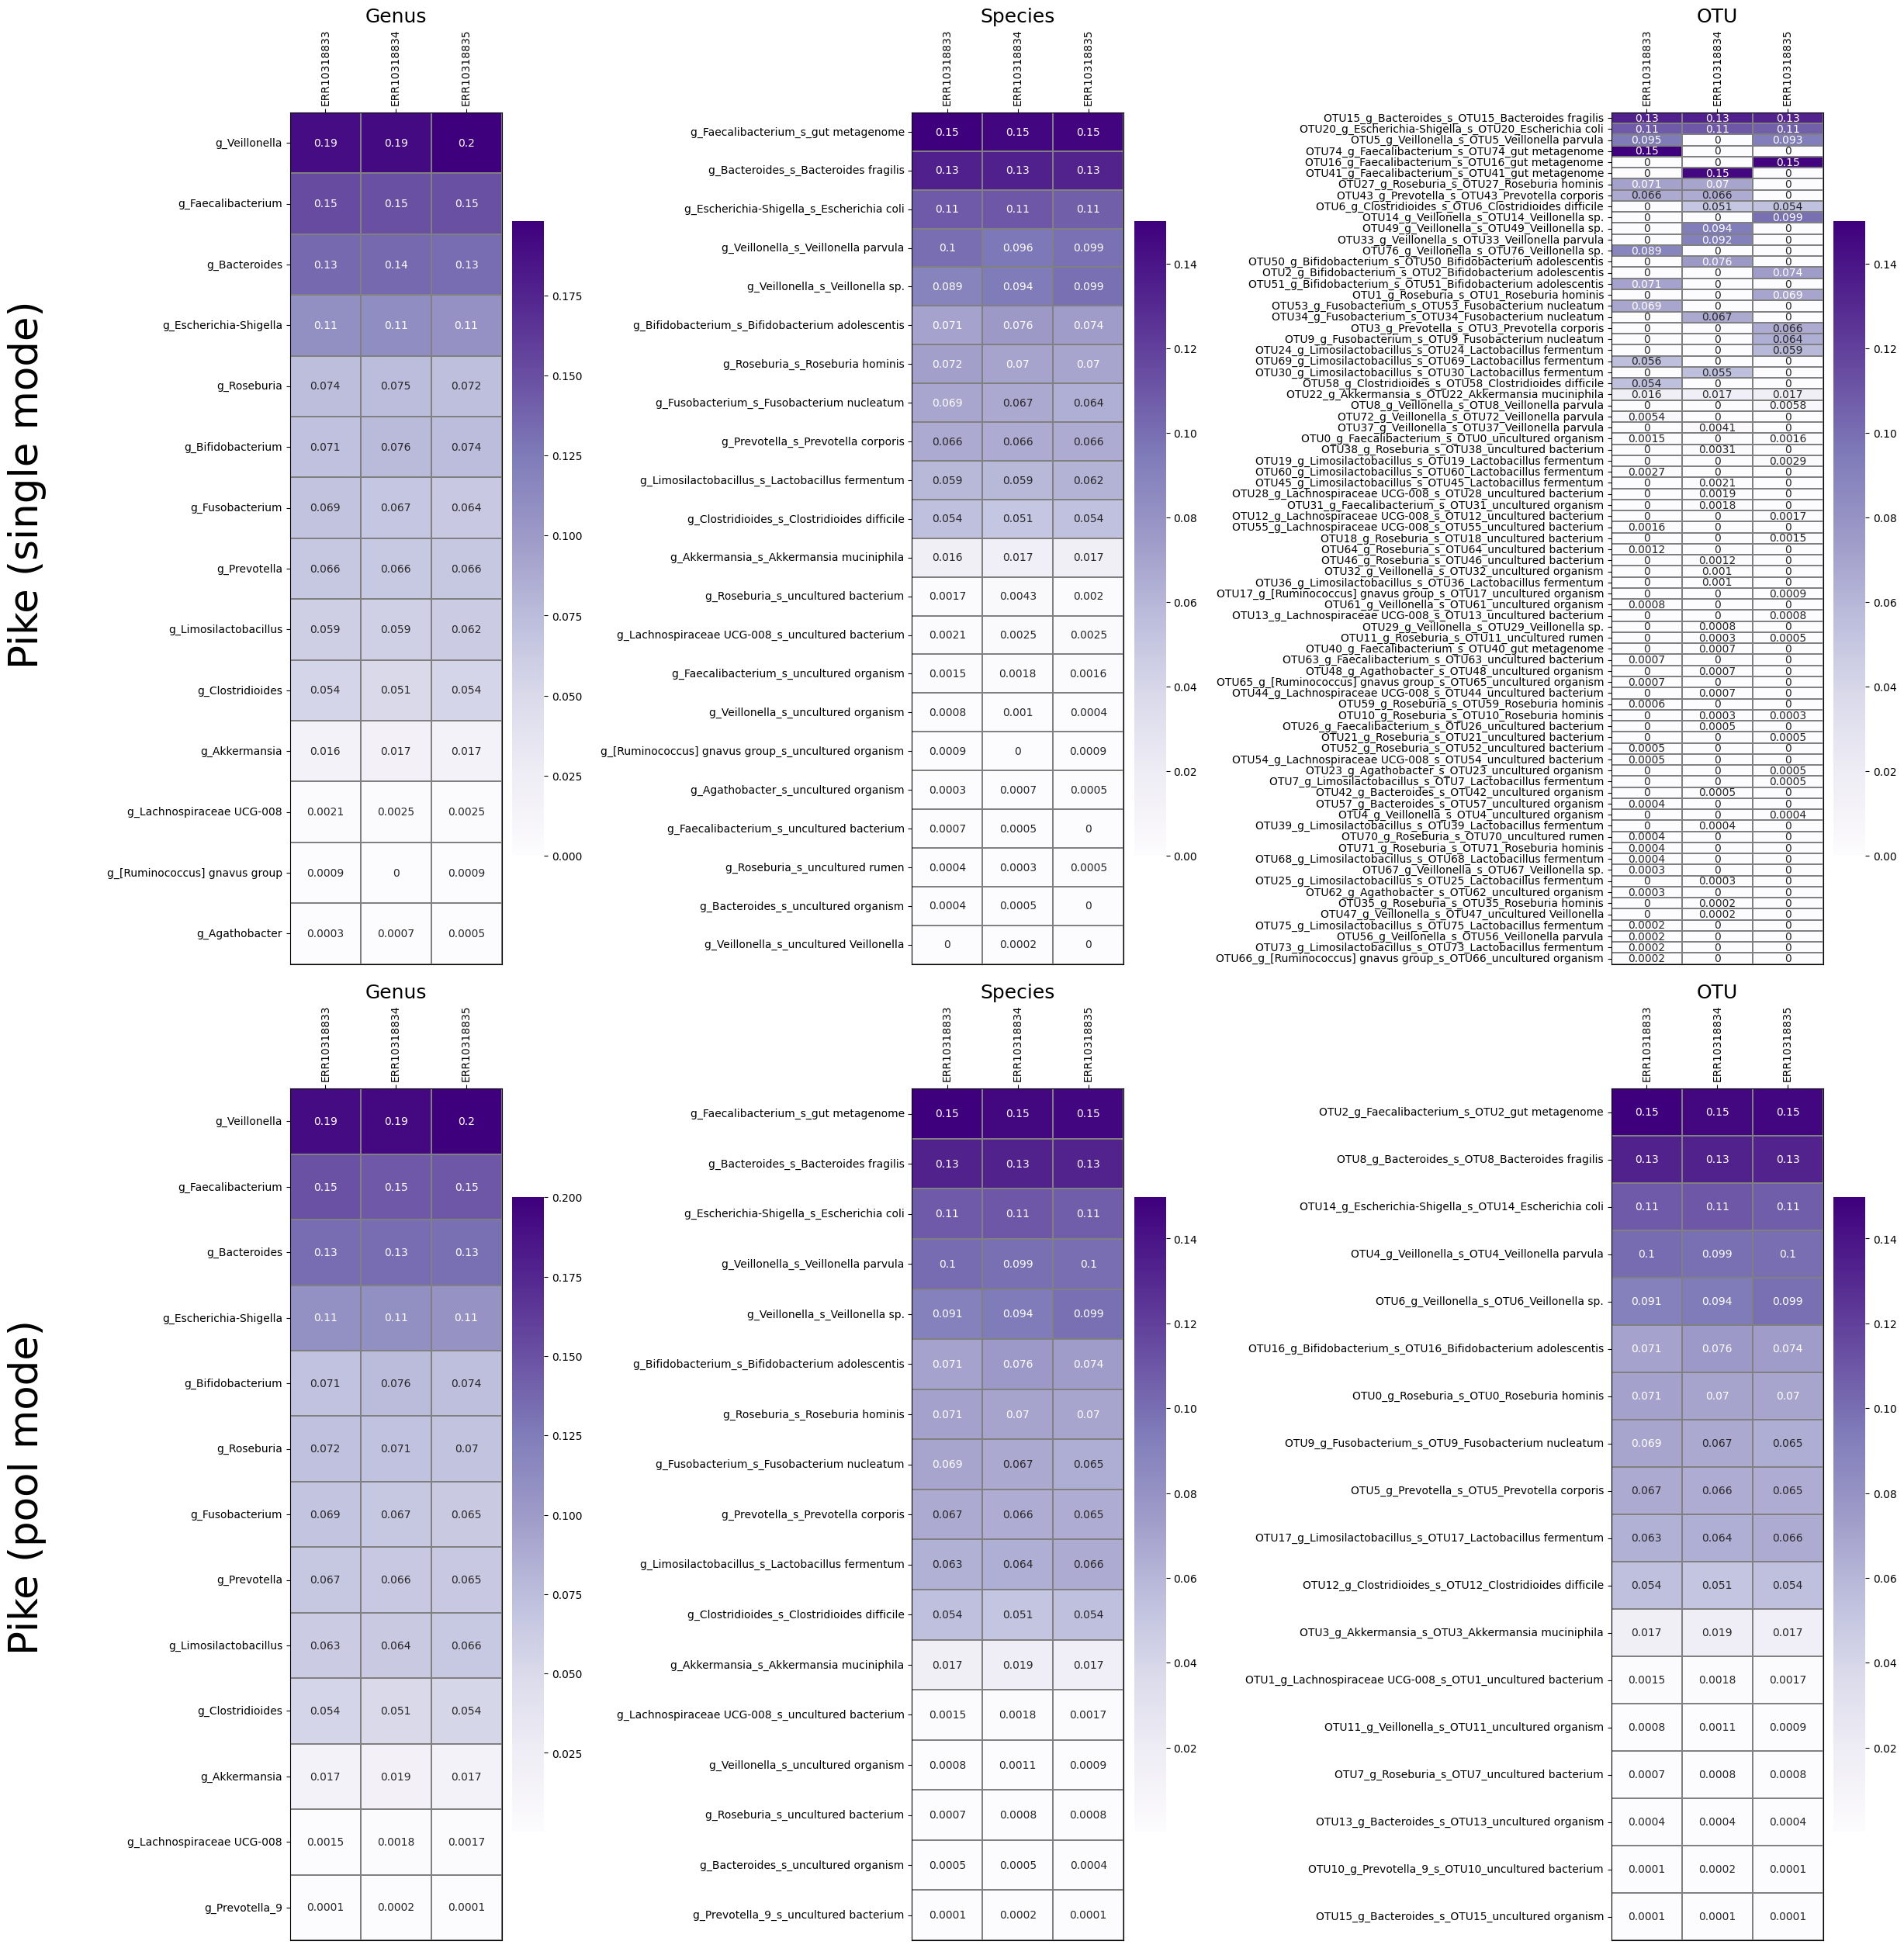

In [169]:

fig, axs = plt.subplots(2, 3, figsize=(25, 25), constrained_layout=True)
#, 
#                        gridspec_kw={'height_ratios': [1, 0.4]}, constrained_layout=True)
x_coord = 0
y_coord = 0

for at in full_data.keys():
    
    for taxlevel in tqdm(['Genus', 'Species', 'OTU']):
        
        data_tax_df = full_data[at][taxlevel]#[0]

        data_tax_df = data_tax_df.assign(m=data_tax_df.mean(axis=1)).sort_values('m').drop('m', axis=1)[np.sort(data_tax_df.columns)]
        data_tax_df_viz = data_tax_df[::-1]#[:25]
        data_tax_df_viz = data_tax_df_viz.rename(columns=decode_names)

        sns.heatmap(np.round(data_tax_df_viz, 4), 
                    ax=axs[y_coord][x_coord], cmap='Purples', linewidths=.1, linecolor='grey',
                    annot=True)
        axs[y_coord][x_coord].xaxis.tick_top()
        axs[y_coord][x_coord].set_title(taxlevel, fontsize=18)
        axs[y_coord][x_coord].set_xlabel('')
        
        for spine in axs[y_coord][x_coord].spines.values():
            spine.set_visible(True)
        for spine in axs[y_coord][x_coord].spines.values():
            spine.set(visible=True, lw=.8, edgecolor="black")
        
        axs[y_coord][x_coord].tick_params(axis='x', labelrotation=90)
        axs[y_coord][x_coord].tick_params(axis='y', labelrotation=360)
    
        
        #matrix = np.triu(np.round(data_tax_df.corr('spearman'), 2))
       # viz = DataFrame(data=np.round(squareform(pdist(clr(data_tax_df.T + 0.0001)), 'euclidean'), 2), index=data_tax_df.columns, columns=data_tax_df.columns)
        viz = np.round(data_tax_df.corr('spearman'), 2)
        
        #g = sns.heatmap(viz, 
        #            ax=axs[1][x_coord], cmap='Purples', linewidths=.1, linecolor='grey', annot=True)
    
    
   #     axs[1][x_coord].set_xlabel('')
   #     axs[1][x_coord].set_ylabel('')
   #     for spine in axs[1][x_coord].spines.values():
    #        spine.set_visible(True)
    #    for spine in axs[1][x_coord].spines.values():
    #        spine.set(visible=True, lw=.8, edgecolor="black")
    #        
    #    axs[1][x_coord].tick_params(axis='x', labelrotation=90)

        x_coord += 1
        
    y_coord += 1
    x_coord = 0
#axs[1].text(0.35, -4, 'Single', fontsize=33)
#axs[4].text(0.65, -3., 'Pool', fontsize=33)
axs[0][0].text(-4, 9, 'Pike (single mode)', fontsize=37, rotation=90)
axs[1][0].text(-4, 8.5, 'Pike (pool mode)', fontsize=37, rotation=90)

#plt.tight_layout(w_pad=5)
plt.savefig('VIZ/EXTERNAL_ZYMO.png', dpi=800, bbox_inches='tight')
plt.savefig('VIZ/EXTERNAL_ZYMO.pdf', bbox_inches='tight')
plt.show()

In [153]:
data_tax_df = full_data['pool']['Genus']#[0]
data_tax_df

,barcode01,barcode02,barcode03
g_Prevotella_9,0.000129,0.000185,0.000123
g_Lachnospiraceae UCG-008,0.001520,0.001803,0.001711
g_Akkermansia,0.016842,0.018709,0.017213
g_Clostridioides,0.054319,0.051081,0.053883
g_Limosilactobacillus,0.062899,0.064292,0.066133
g_Prevotella,0.066677,0.065534,0.065421
g_Fusobacterium,0.069223,0.066827,0.064635
g_Roseburia,0.071822,0.070795,0.070269
g_Bifidobacterium,0.070766,0.076203,0.074199
g_Escherichia-Shigella,0.108828,0.109839,0.106906


In [154]:
data_tax_df = full_data['single']['Genus']#[0]
data_tax_df

,barcode01,barcode02,barcode03
g_Agathobacter,0.000251,0.000711,0.000461
g_[Ruminococcus] gnavus group,0.000898,0.000000,0.000880
g_Lachnospiraceae UCG-008,0.002108,0.002541,0.002541
g_Akkermansia,0.016380,0.017433,0.016694
g_Clostridioides,0.054011,0.051002,0.053651
g_Limosilactobacillus,0.059034,0.058714,0.062006
g_Prevotella,0.066273,0.065812,0.066101
g_Fusobacterium,0.069249,0.066901,0.064448
g_Bifidobacterium,0.070710,0.076036,0.074506
g_Roseburia,0.074333,0.074880,0.072138


In [158]:
taxtab = read_csv('/mnt/AsusShareI2/RUNS/runs-krivonos/PIKE_DATA/EXTERNAL/EXTERNAL_ZYMO/mock_Zymo_single//TAXONOMY/tax_table.tsv', sep='\t', index_col=0)
taxtab[taxtab.Genus == 'g_[Ruminococcus] gnavus group']

,Kingdom,Phylum,Class,Order,Family,Genus,Species


In [163]:
taxtab[taxtab.Genus.str.contains('Limosilactobacillus')]

,Kingdom,Phylum,Class,Order,Family,Genus,Species
GTCCCAATCACGAGTCTCACCTTAGACGGCTCCCCCCAAAAAGGTTGGGCCACCGGCTTCGGGTGCTACCCACTTTCATGACTTGACGGGCGGTGTGTACAAGGCCCGGGAACGCATTCACCGCGGCGTTGCTGATCCGCGATTACTAGCGACTCCGCCTTCATGGAGTCGGGTTGCAGACTCCAATCCGAACTGAGACCGGTTTTAAGGGATCCGCTCCCCCTCACGAGGTCGCATCCCGTTGTACCGGCCATTGTAGCATGCGTGAAGCCCTGGACGTAAGGGGCATGATGATCTGACGTCATCCCCACCTTCCTCCGAGTTGACCCCGGCGGTCCCCCGTGAGTTCCCACCACGACGTGCTGGCAACACAGGGCGAGGGTTGCGCTCGTTGCGGGACTTAACCCAACATCTCACGACACGAGCTGACGACGACCATGCACCACCTGTGAACCCGCCCCGAAGGGAGGCCCCATCTCTGGGGCTGTCGGGAACATGTCAAGCCCAGGTAAGGTTCTTCGCGTTGCATCGAATTAATCCGCATGCTCCGCCGCTTGTGCGGGCCCCCGTCAATTTCTTTGAGTTTTAACCTTGCGGTCGTACTCCCCAGGCGGAGTGCTTAATGCGTTAGCTCCGGCACTGAAGGGCGGAAACCCTCCAACACCTAGCACTCATCGTTTACGGCATGGACTACCAGGGTATCTAATCCTGTTCGCTACCCATGCTTTCGAGTCTCAGCGTCAGTTGCAGACCAGGTAGCCGCCTTCGCCACTGGTGTTCTTCCATATATCTACGCATTCCACCGCTACACATGGAGTTCCACTACCCTCTTCTGCACTCAAGTTATCCAGTTTCCGATGCACTTCTCCGGTTAAGCCGAAGGCTTTCACATCAGACTTAGAAAACCGCCTGCACTCTCTTTACGCCCAATAAATCCGGATAACGCTTGCCACCTACGTATTACCGCGGCTGCTGGCACGTAGTTAGCCGTGACTTTCTGGTTAAATACCGTCAACGTATGAACAGTTACTCTCATACGTGTTCTTCTTTAACAACAGAGCTTTACGAGCCGAAACCCTTCTTCACTCACGCGGTGTTGCTCCATCAGGCTTGCGCCCATTGTGGAAGATTCCCTACTGCTGCCTCCCGTAGGAGTATGGGCCGTGTCTCAGTCCCATTGTGGCCGATCAGTCTCTCAACTCGGCTATGCATCATCGCCTTGGTAGGCCGTTACCCCACCAACAAGCTAATGCACCGCAGGTCCATCCAGAAGTGATAGCGAGAAGCCATCTTTTAAGCGTTGTTCATGCGAACAACGTTGTTATGCGGTATTAGCATCTGTTTCCAAATGTTGTCCCCCGCTTCTGGGCAGGTTACCTACGTGTTACTCACCCGTCCGCCACTCGTTGGCGACCAAAATCAATCAGGTGCAAGCACCATCAATCAATTGGGCCAACGCGTTCGACTTGCATGTATTAGGCACACCGCCGGCGTTCATC,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Limosilactobacillus,Lactobacillus fermentum
ACCCCAATCATCGACTTTACCTTAGACGGCTGGCTCCCGAAGGTTACCCCACCGGCTTTGGGCACTTCCGACTTTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCAGTATGCTGACCTGCGATTACTAGCGATTCCGACTTCACGTAGGCGAGTTGCAGCCTACGATCCGAACTGAGAGAGTGTTTCTCGGGTTTGCTCCATCTCGCGATCTCGCTTCCGTCTATTAACTCCCATTGTAGTACGTGTGTAGCCCAGGTCATAAGGGGCATGATGATTTGACGTCATCCCCGCCTTCCTCCGCATTGTCTGCGGCAGTCTCTCATGAGTTCCCACCATTACGTGCTGGCAACATAAGATAGGGGTTGCGCTCGTTGCGGGACTTAACCCAACATCTCACGACACGAGCTGACGACAACCGTGCACCACCTGTTTTCTGGCTTCCGAAGAAGAGGAACTATCTCTAGTTCTGTGCATCAATGTCAAGACCTGGTAAGGTTCTTCGCGTTGCGTCGAATTAAACCACATACTCCACCGCTTGTGCGGGCCCCCGTCAATTCCTTTGAGTTTCAACCTTGCGGTCGTACTCCCCAGGCGGAGTGCTTAATGCGTTAGCTCCGGCACTGAAGGGCGGAAACCCTCCAACACCTAGCACTCATCGTTTACGGCATGGACTACCAGGGTATCTAATCCTGTTCGCTACCCATGCTTTCGAGTCTCAGCGTCAGTTGCAGACCAGGTAGCCGCCTTCGCCACTGGTGTTCTTCCATATATCTACGCATTCCACCGCTACACATGGAGTTCCACTACCCTCTTCTGCACTCAAGTTATCCAGTTTCCGATGCACTTCTCCGGTTAAGCCGAAGGCTTTCACATCAGACTTAGAAAACCGCCTGCACTCTCTTTACGCCCAATAAATCCGGATAACGCTTGCCACCTACGTATTACCGCGGCTGCTGGCACGTAGTTAGCCGTGACTTTCTGGTTAAATACCGTCAACGTATGAACAGTTACTCTCATACGTGTTCTTCTTTAACAACAGAGCTTTACGAGCCGAAACCCTTCTTCACTCACGCGGTGTTGCTCCATCAGGCTTGCGCCCATTGTGGAAGATTCCCTACTGCTGCCTCCCGTAGGAGTATGGGCCGTGTCTCAGTCCCATTGTGGCCGATCAGTCTCTCAACTCGGCTATGCATCATCGCCTTGGTAGGCCGTTACCCCACCAACAAGCTAATGCACCGCAGGTCCATCCAGAAGTGATAGCGAGAAGCCATCTTTTAAGCGTTGTTCATGCGAACAACGTTGTTATGCGGTATTAGCATCTGTTTCCAAATGTTGTCCCCCGCTTCTGGGCAGGTTACCTACGTGTTACTCACCCGTCCGCCACTCGTTGGCGACCAAAATCAATCAGGTGCAAGCACCATCAATCAATTGGGCCAACGCGTTCGACTTGCATGTATTAGGCACACCGCCGGCGTTCATC,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Limosilactobacillus,Lactobacillus fermentum
AACCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCTAAAAGGTTACCCCACCGACTTTGGGTGTTACAAACTCTCATGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCGACTTCGTGCAGGCGAGTTGCAGCCTGCAGTCCGAACTGAGAACGGTTTTAAGAGATTTGCTTGCCCTCGCGAGTTCGCGACTCGTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAGGTCATAAGGGGCATGATGATCTGACGTCGTCCCCACCTTCCTCCGGTTTGTCACCGGCAGTCTCACTAGAGTGCCCAACTTAATGCTGGCAACTAGTAACAAGGGTTGCGCTCGTTGCGGGACTTAACCCAACATCTCACGACACGAGCTGACGACGACCATGCACCACCTGTCATTGCGTTCCCGAAGGAAACGCCCTATCTCTAGGGTTGGCGCAAGATGTCAAGACCTGGTAAGGTTCTTCGCGTAGCTTCGAATTAAACCACATGCTCCACCGCTTGTGCGGGCCCCCGTCAATTCCTTTGAGTTTCAACCTTGCGGTCGTACTCCCCAGGCGGAGTGCTTAATGCGTTAGCTCCGGCACTGAAGGGCGGAAACCCTCCAACACCTAGCACTCATCGTTTACGGCATGGACTACCAGGGTATCTAATCCTGTTCGCTACCCATGCTTTCGAGTCTCAGCGTCA

In [164]:
0.009/100

8.999999999999999e-05